# Convolutional Neural Network - Deep Learning and Neural Network

In [9]:
# pip install opencv-python numpy tqdm matplotlib
import torch
import os
import cv2
import numpy as np
from tqdm import tqdm

Download 
[Cat and Dogs Data Set](https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip)

### Convolutional NN is used for Image task
 Convolutions NN is doing better that Current neural network

#### Convolutional NN
it accepts 2D inputs or 3D (3 dimensional) model
is goal is to locate object


In [6]:
REBUILD_DATA = True # set to true to one once, then back to false unless you want to change something in your training data.

class DogsVSCats():
    IMG_SIZE = 50
    CATS = "data/PetImages/Cat"
    DOGS = "data/PetImages/Dog"
    TESTING = "data/PetImages/Testing"
    LABELS = {CATS: 0, DOGS: 1}
    training_data = []

    catcount = 0
    dogcount = 0

    def make_training_data(self):
        for label in self.LABELS:
            print(label)
            for f in tqdm(os.listdir(label)):
                if "jpg" in f:
                    try:
                        path = os.path.join(label, f)
                        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), np.eye(2)[self.LABELS[label]]])  # do something like print(np.eye(2)[1]), just makes one_hot 
                        #print(np.eye(2)[self.LABELS[label]])

                        if label == self.CATS:
                            self.catcount += 1
                        elif label == self.DOGS:
                            self.dogcount += 1

                    except Exception as e:
                        pass
                        #print(label, f, str(e))

        np.random.shuffle(self.training_data)
        np.save("training_data.npy", self.training_data)
        print('Cats:',dogsvcats.catcount)
        print('Dogs:',dogsvcats.dogcount)

if REBUILD_DATA:
    dogsvcats = DogsVSCats()
    dogsvcats.make_training_data()

  0%|          | 48/12503 [00:00<00:26, 474.85it/s]

data/PetImages/Cat


  0%|          | 55/12501 [00:00<00:22, 547.69it/s]

data/PetImages/Dog


100%|██████████| 12501/12501 [00:22<00:00, 567.71it/s]


Cats: 12476
Dogs: 12470


In [7]:
training_data = np.load("training_data.npy", allow_pickle=True)
print(len(training_data))

24946


In [10]:

X = torch.Tensor([i[0] for i in training_data]).view(-1,50,50)
X = X/255.0
y = torch.Tensor([i[1] for i in training_data])

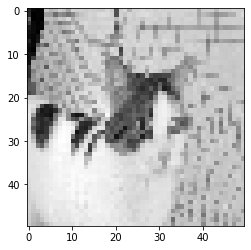

In [12]:
import matplotlib.pyplot as plt

plt.imshow(X[0], cmap="gray")

In [13]:
print(y[0])

tensor([1., 0.])
